# Import libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


In [57]:
#Import data
data = pd.read_csv('DARWIN.csv')

# Initial EDA

In [58]:
data.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [59]:
data.shape

(174, 452)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [61]:
data.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


In [62]:
#Replace string H/P with numeric 0, 1
data['class'].replace(['H','P'],[0,1], inplace = True)
data.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1


# Isolate Tasks 2, 6, 12, 15, 22

In [63]:
df = data[['air_time2', 'disp_index2', 'gmrt_in_air2', 'gmrt_on_paper2', 'max_x_extension2', 
 'max_y_extension2', 'mean_acc_in_air2', 'mean_acc_on_paper2', 'mean_gmrt2', 
 'mean_jerk_in_air2', 'mean_jerk_on_paper2', 'mean_speed_in_air2', 'mean_speed_on_paper2', 
 'num_of_pendown2', 'paper_time2', 'pressure_mean2', 'pressure_var2', 'total_time2',
 'air_time6', 'disp_index6', 'gmrt_in_air6', 'gmrt_on_paper6', 'max_x_extension6', 
 'max_y_extension6', 'mean_acc_in_air6', 'mean_acc_on_paper6', 'mean_gmrt6', 'mean_jerk_in_air6', 
 'mean_jerk_on_paper6', 'mean_speed_in_air6', 'mean_speed_on_paper6', 'num_of_pendown6', 
 'paper_time6', 'pressure_mean6', 'pressure_var6', 'total_time6', 'air_time12', 'disp_index12', 
 'gmrt_in_air12', 'gmrt_on_paper12', 'max_x_extension12', 'max_y_extension12', 
 'mean_acc_in_air12', 'mean_acc_on_paper12', 'mean_gmrt12', 'mean_jerk_in_air12', 
 'mean_jerk_on_paper12', 'mean_speed_in_air12', 'mean_speed_on_paper12', 'num_of_pendown12', 
 'paper_time12', 'pressure_mean12', 'pressure_var12', 'total_time12', 'air_time15', 
 'disp_index15', 'gmrt_in_air15', 'gmrt_on_paper15', 'max_x_extension15', 'max_y_extension15', 
 'mean_acc_in_air15', 'mean_acc_on_paper15', 'mean_gmrt15', 'mean_jerk_in_air15', 
 'mean_jerk_on_paper15', 'mean_speed_in_air15', 'mean_speed_on_paper15', 'num_of_pendown15', 
 'paper_time15', 'pressure_mean15', 'pressure_var15', 'total_time15', 'air_time22', 
 'disp_index22', 'gmrt_in_air22', 'gmrt_on_paper22', 'max_x_extension22', 'max_y_extension22', 
 'mean_acc_in_air22', 'mean_acc_on_paper22', 'mean_gmrt22', 'mean_jerk_in_air22', 
 'mean_jerk_on_paper22', 'mean_speed_in_air22', 'mean_speed_on_paper22', 'num_of_pendown22', 
 'paper_time22', 'pressure_mean22', 'pressure_var22', 'total_time22', 'class']]

# Create separate dataframes for individual tasks

In [64]:
df1 = data[['air_time2', 'disp_index2', 'gmrt_in_air2', 'gmrt_on_paper2', 'max_x_extension2', 
 'max_y_extension2', 'mean_acc_in_air2', 'mean_acc_on_paper2', 'mean_gmrt2', 
 'mean_jerk_in_air2', 'mean_jerk_on_paper2', 'mean_speed_in_air2', 'mean_speed_on_paper2', 
 'num_of_pendown2', 'paper_time2', 'pressure_mean2', 'pressure_var2', 'total_time2', 'class']]

df2 = data[[ 'air_time6', 'disp_index6', 'gmrt_in_air6', 'gmrt_on_paper6', 'max_x_extension6', 
 'max_y_extension6', 'mean_acc_in_air6', 'mean_acc_on_paper6', 'mean_gmrt6', 'mean_jerk_in_air6', 
 'mean_jerk_on_paper6', 'mean_speed_in_air6', 'mean_speed_on_paper6', 'num_of_pendown6', 
 'paper_time6', 'pressure_mean6', 'pressure_var6', 'total_time6', 'class']]

df3 = data[[ 'air_time12', 'disp_index12', 
 'gmrt_in_air12', 'gmrt_on_paper12', 'max_x_extension12', 'max_y_extension12', 
 'mean_acc_in_air12', 'mean_acc_on_paper12', 'mean_gmrt12', 'mean_jerk_in_air12', 
 'mean_jerk_on_paper12', 'mean_speed_in_air12', 'mean_speed_on_paper12', 'num_of_pendown12', 
 'paper_time12', 'pressure_mean12', 'pressure_var12', 'total_time12', 'class']]

df4 = data[['air_time15',  'disp_index15', 'gmrt_in_air15', 'gmrt_on_paper15', 'max_x_extension15', 'max_y_extension15', 
 'mean_acc_in_air15', 'mean_acc_on_paper15', 'mean_gmrt15', 'mean_jerk_in_air15', 
 'mean_jerk_on_paper15', 'mean_speed_in_air15', 'mean_speed_on_paper15', 'num_of_pendown15', 
 'paper_time15', 'pressure_mean15', 'pressure_var15', 'total_time15', 'class']]

df5 = data[['air_time22',  'disp_index22', 'gmrt_in_air22', 'gmrt_on_paper22', 'max_x_extension22', 'max_y_extension22', 
 'mean_acc_in_air22', 'mean_acc_on_paper22', 'mean_gmrt22', 'mean_jerk_in_air22', 
 'mean_jerk_on_paper22', 'mean_speed_in_air22', 'mean_speed_on_paper22', 'num_of_pendown22', 
 'paper_time22', 'pressure_mean22', 'pressure_var22', 'total_time22', 'class']]

In [65]:
df1.columns = ['air_time', 'disp_index', 'gmrt_in_air', 'gmrt_on_paper', 'max_x_extension', 
 'max_y_extension', 'mean_acc_in_air', 'mean_acc_on_paper', 'mean_gmrt', 
 'mean_jerk_in_air', 'mean_jerk_on_paper', 'mean_speed_in_air', 'mean_speed_on_paper', 
 'num_of_pendown', 'paper_time', 'pressure_mean', 'pressure_var', 'total_time', 'class']

df2.columns = ['air_time', 'disp_index', 'gmrt_in_air', 'gmrt_on_paper', 'max_x_extension', 
 'max_y_extension', 'mean_acc_in_air', 'mean_acc_on_paper', 'mean_gmrt', 
 'mean_jerk_in_air', 'mean_jerk_on_paper', 'mean_speed_in_air', 'mean_speed_on_paper', 
 'num_of_pendown', 'paper_time', 'pressure_mean', 'pressure_var', 'total_time', 'class']

df3.columns = ['air_time', 'disp_index', 'gmrt_in_air', 'gmrt_on_paper', 'max_x_extension', 
 'max_y_extension', 'mean_acc_in_air', 'mean_acc_on_paper', 'mean_gmrt', 
 'mean_jerk_in_air', 'mean_jerk_on_paper', 'mean_speed_in_air', 'mean_speed_on_paper', 
 'num_of_pendown', 'paper_time', 'pressure_mean', 'pressure_var', 'total_time', 'class']

df4.columns = ['air_time', 'disp_index', 'gmrt_in_air', 'gmrt_on_paper', 'max_x_extension', 
 'max_y_extension', 'mean_acc_in_air', 'mean_acc_on_paper', 'mean_gmrt', 
 'mean_jerk_in_air', 'mean_jerk_on_paper', 'mean_speed_in_air', 'mean_speed_on_paper', 
 'num_of_pendown', 'paper_time', 'pressure_mean', 'pressure_var', 'total_time', 'class']

df5.columns = ['air_time', 'disp_index', 'gmrt_in_air', 'gmrt_on_paper', 'max_x_extension', 
 'max_y_extension', 'mean_acc_in_air', 'mean_acc_on_paper', 'mean_gmrt', 
 'mean_jerk_in_air', 'mean_jerk_on_paper', 'mean_speed_in_air', 'mean_speed_on_paper', 
 'num_of_pendown', 'paper_time', 'pressure_mean', 'pressure_var', 'total_time', 'class']


# EDA on Group 6 Tasks

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 91 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   air_time2              174 non-null    int64  
 1   disp_index2            174 non-null    float64
 2   gmrt_in_air2           174 non-null    float64
 3   gmrt_on_paper2         174 non-null    float64
 4   max_x_extension2       174 non-null    int64  
 5   max_y_extension2       174 non-null    int64  
 6   mean_acc_in_air2       174 non-null    float64
 7   mean_acc_on_paper2     174 non-null    float64
 8   mean_gmrt2             174 non-null    float64
 9   mean_jerk_in_air2      174 non-null    float64
 10  mean_jerk_on_paper2    174 non-null    float64
 11  mean_speed_in_air2     174 non-null    float64
 12  mean_speed_on_paper2   174 non-null    float64
 13  num_of_pendown2        174 non-null    int64  
 14  paper_time2            174 non-null    int64  
 15  pressu

In [67]:
df.head()

,air_time2,disp_index2,gmrt_in_air2,gmrt_on_paper2,max_x_extension2,max_y_extension2,mean_acc_in_air2,mean_acc_on_paper2,mean_gmrt2,mean_jerk_in_air2,...,mean_jerk_in_air22,mean_jerk_on_paper22,mean_speed_in_air22,mean_speed_on_paper22,num_of_pendown22,paper_time22,pressure_mean22,pressure_var22,total_time22,class
0,6085,0.000012,269.355789,51.342263,749,4945,0.616121,0.076406,160.349026,0.110648,...,0.029819,0.022101,2.701250,2.982744,12,4970,1828.508048,215302.3807,18185,1
1,10515,0.000015,272.771237,73.115855,2298,5051,0.880795,0.103937,172.943546,0.157950,...,0.023457,0.018054,1.294354,0.859578,14,15335,1562.307141,288329.6859,33890,1
2,560,0.000010,122.809584,92.983279,322,5059,0.211138,0.075103,107.896432,0.030854,...,0.047833,0.019266,2.960017,2.388018,12,5505,1680.804723,222939.0745,12930,1
3,13735,0.000014,185.278506,50.141555,647,4714,0.344579,0.129888,117.710030,0.053323,...,0.033208,0.018421,2.703142,1.813868,13,7090,1527.334274,214911.8657,16079,1
4,4225,0.000012,112.619685,63.490164,285,4597,0.434237,0.081101,88.054925,0.067753,...,0.024897,0.019095,2.368904,2.020428,12,5060,1829.972332,186153.5328,8835,1


In [68]:
df.shape

(174, 91)

<AxesSubplot:xlabel='class', ylabel='count'>

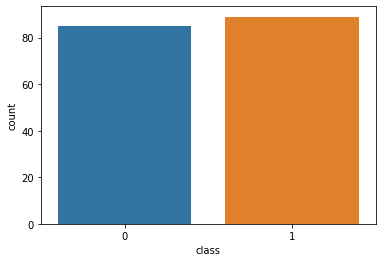

In [69]:
#Check for balanced data 
sns.countplot(data = df, x = 'class')

# Correlation to determine which features have most impact on correct diagnosis

AxesSubplot(0.125,0.125;0.62x0.755)
max_y_extension12    0.003908
mean_gmrt2           0.016602
mean_jerk_in_air6    0.033084
mean_acc_in_air6     0.036268
pressure_var6        0.039506
                       ...   
paper_time15         0.389440
total_time6          0.396218
total_time15         0.400314
disp_index22         0.425910
class                1.000000
Name: class, Length: 91, dtype: float64


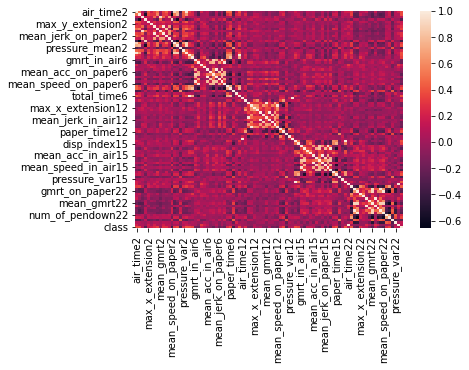

In [70]:
print(sns.heatmap(df.corr()))
corr = df.corr()["class"].abs().sort_values()
print(corr)

# Heatmaps and correlation values by task

AxesSubplot(0.125,0.125;0.62x0.755)
mean_gmrt              0.016602
gmrt_in_air            0.100580
mean_speed_in_air      0.133368
max_x_extension        0.155124
max_y_extension        0.188289
pressure_var           0.243384
mean_acc_in_air        0.258746
mean_jerk_on_paper     0.269959
mean_jerk_in_air       0.276751
gmrt_on_paper          0.289496
pressure_mean          0.292291
num_of_pendown         0.303478
mean_acc_on_paper      0.332280
air_time               0.354112
mean_speed_on_paper    0.358033
disp_index             0.365189
paper_time             0.381589
total_time             0.389171
class                  1.000000
Name: class, dtype: float64


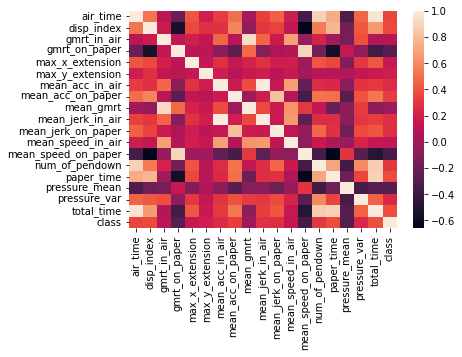

In [71]:
print(sns.heatmap(df1.corr()))
corr1 = df1.corr()["class"].abs().sort_values()
print(corr1)

AxesSubplot(0.125,0.125;0.62x0.755)
mean_jerk_in_air       0.033084
mean_acc_in_air        0.036268
pressure_var           0.039506
max_y_extension        0.075265
mean_acc_on_paper      0.101445
mean_speed_in_air      0.129302
max_x_extension        0.182776
gmrt_in_air            0.189973
gmrt_on_paper          0.194625
mean_jerk_on_paper     0.205480
mean_speed_on_paper    0.221440
mean_gmrt              0.233395
num_of_pendown         0.246129
disp_index             0.327207
pressure_mean          0.363065
paper_time             0.364574
air_time               0.375045
total_time             0.396218
class                  1.000000
Name: class, dtype: float64


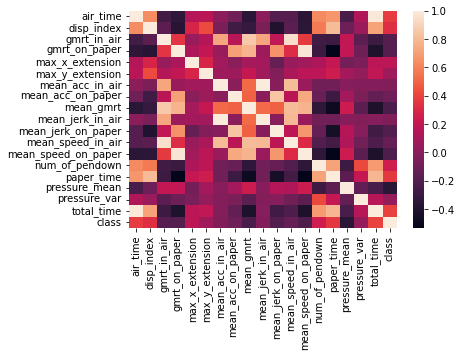

In [72]:
print(sns.heatmap(df2.corr()))
corr2 = df2.corr()["class"].abs().sort_values()
print(corr2)

AxesSubplot(0.125,0.125;0.62x0.755)
max_y_extension        0.003908
air_time               0.042378
pressure_var           0.056421
mean_jerk_in_air       0.059047
mean_acc_in_air        0.066265
total_time             0.071175
max_x_extension        0.102746
mean_acc_on_paper      0.128245
gmrt_in_air            0.145090
mean_speed_in_air      0.161608
mean_gmrt              0.168539
gmrt_on_paper          0.177486
mean_jerk_on_paper     0.198694
mean_speed_on_paper    0.212657
num_of_pendown         0.214643
disp_index             0.234490
pressure_mean          0.305930
paper_time             0.361880
class                  1.000000
Name: class, dtype: float64


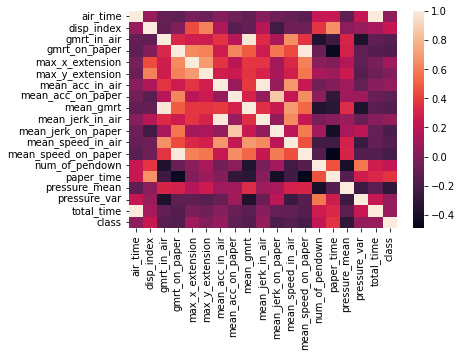

In [73]:
print(sns.heatmap(df3.corr()))
corr3 = df3.corr()["class"].abs().sort_values()
print(corr3)

AxesSubplot(0.125,0.125;0.62x0.755)
mean_speed_in_air      0.059767
pressure_var           0.060225
gmrt_in_air            0.084006
mean_acc_in_air        0.094210
mean_jerk_in_air       0.101225
max_x_extension        0.146231
max_y_extension        0.150333
mean_acc_on_paper      0.150717
mean_gmrt              0.214747
gmrt_on_paper          0.264520
mean_jerk_on_paper     0.268802
num_of_pendown         0.297340
pressure_mean          0.312932
disp_index             0.321289
mean_speed_on_paper    0.322977
air_time               0.382737
paper_time             0.389440
total_time             0.400314
class                  1.000000
Name: class, dtype: float64


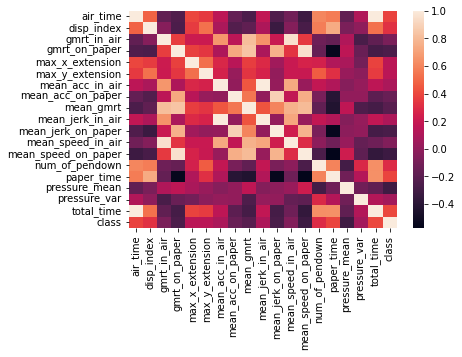

In [74]:
print(sns.heatmap(df4.corr()))
corr4 = df4.corr()["class"].abs().sort_values()
print(corr4)

AxesSubplot(0.125,0.125;0.62x0.755)
mean_acc_on_paper      0.103018
air_time               0.103936
mean_acc_in_air        0.104443
mean_jerk_in_air       0.112607
total_time             0.115723
max_y_extension        0.119933
pressure_var           0.132121
mean_jerk_on_paper     0.149436
gmrt_in_air            0.198223
mean_speed_in_air      0.227915
max_x_extension        0.239497
num_of_pendown         0.240357
mean_gmrt              0.263054
pressure_mean          0.275034
gmrt_on_paper          0.277141
mean_speed_on_paper    0.290684
paper_time             0.348606
disp_index             0.425910
class                  1.000000
Name: class, dtype: float64


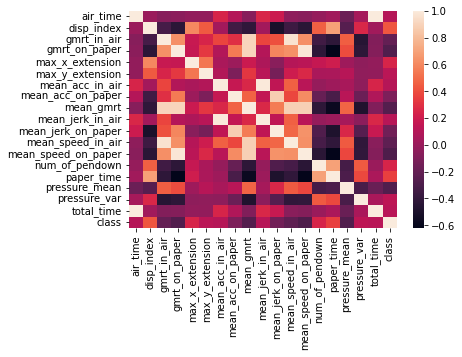

In [75]:
print(sns.heatmap(df5.corr()))
corr5 = df5.corr()["class"].abs().sort_values()
print(corr5)

# Combine correlation values to determine which are largest

In [76]:
allCorr = pd.concat([corr1, corr2, corr3, corr4, corr5], axis = 1)

#label class by task
allCorr.columns = ['Task 2', 'Task 6', 'Task12', 'Task 15', 'Task 22']

#add columns for max, mean and min correlation coefficients
allCorr['Min Corr'] = allCorr.min(axis = 1)
allCorr['Max Corr'] = allCorr.max(axis = 1)
allCorr['Mean Corr'] = allCorr.mean(axis = 1)

print(allCorr)

                       Task 2    Task 6    Task12   Task 15   Task 22  \
mean_gmrt            0.016602  0.233395  0.168539  0.214747  0.263054   
gmrt_in_air          0.100580  0.189973  0.145090  0.084006  0.198223   
mean_speed_in_air    0.133368  0.129302  0.161608  0.059767  0.227915   
max_x_extension      0.155124  0.182776  0.102746  0.146231  0.239497   
max_y_extension      0.188289  0.075265  0.003908  0.150333  0.119933   
pressure_var         0.243384  0.039506  0.056421  0.060225  0.132121   
mean_acc_in_air      0.258746  0.036268  0.066265  0.094210  0.104443   
mean_jerk_on_paper   0.269959  0.205480  0.198694  0.268802  0.149436   
mean_jerk_in_air     0.276751  0.033084  0.059047  0.101225  0.112607   
gmrt_on_paper        0.289496  0.194625  0.177486  0.264520  0.277141   
pressure_mean        0.292291  0.363065  0.305930  0.312932  0.275034   
num_of_pendown       0.303478  0.246129  0.214643  0.297340  0.240357   
mean_acc_on_paper    0.332280  0.101445  0.128245  

# Pair plot of features with greatest correlation values

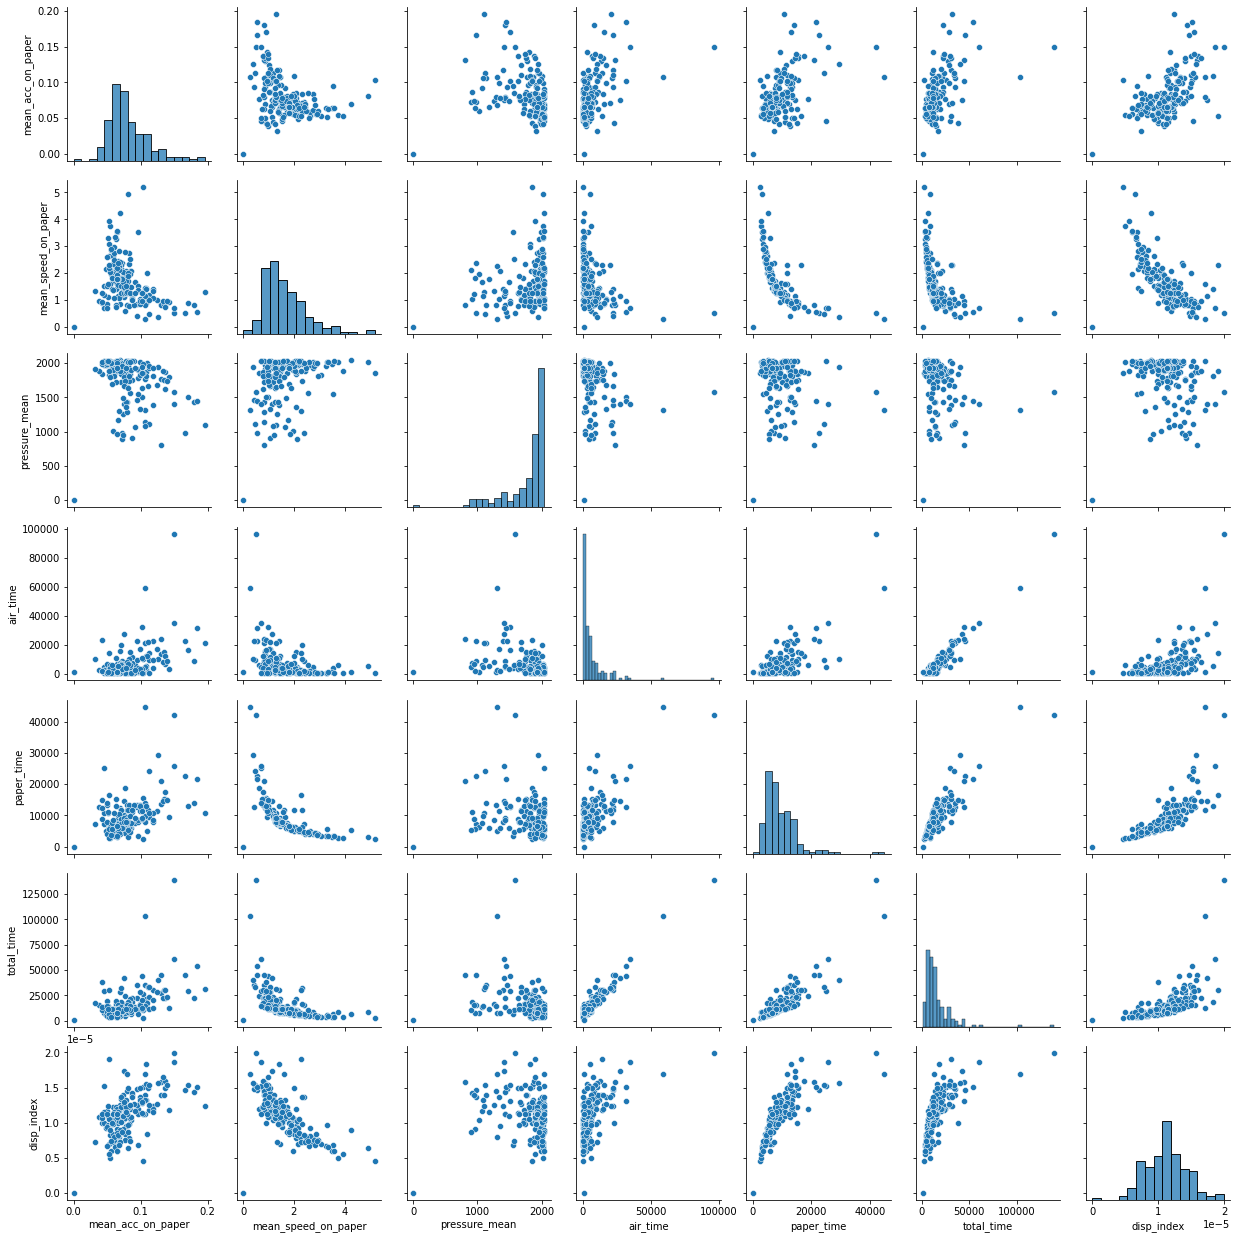

In [77]:
#Pairplot of columns with greatest correlation values

cols_to_plot = ['mean_acc_on_paper', 'mean_speed_on_paper', 'pressure_mean', 'air_time', 'paper_time','total_time', 'disp_index']
sns.pairplot(df1[cols_to_plot])

# Histograms of Total Time

Text(0.5, 1.0, 'Total Time\nTask 2')

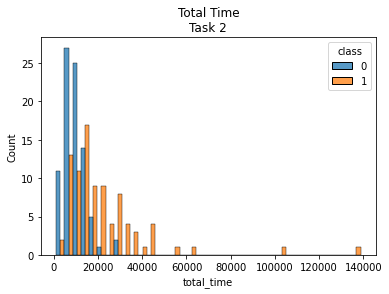

In [78]:
sns.histplot(data=df1, x="total_time", hue = 'class', multiple = 'dodge')
plt.title('Total Time\nTask 2')

Text(0.5, 1.0, 'Total Time\nTask 6')

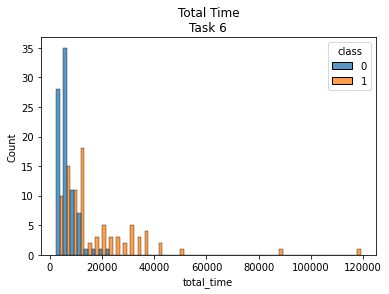

In [79]:
sns.histplot(data=df2, x="total_time", hue = 'class', multiple = 'dodge')
plt.title('Total Time\nTask 6')

Text(0.5, 1.0, 'Total Time\nTask 12')

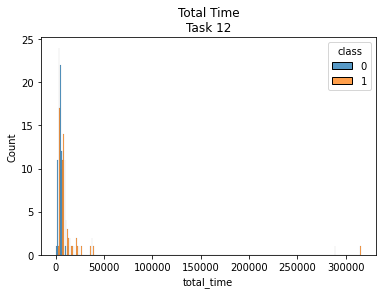

In [80]:
sns.histplot(data=df3, x="total_time", hue = 'class', multiple = 'dodge')
plt.title('Total Time\nTask 12')

Text(0.5, 1.0, 'Total Time\nTask 2')

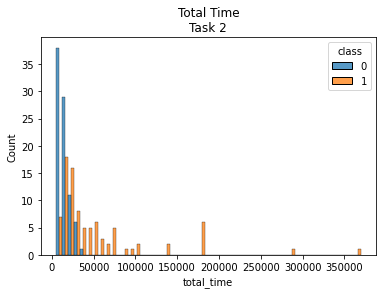

In [81]:
sns.histplot(data=df4, x="total_time", hue = 'class', multiple = 'dodge')
plt.title('Total Time\nTask 2')


Text(0.5, 1.0, 'Total Time\nTask 2')

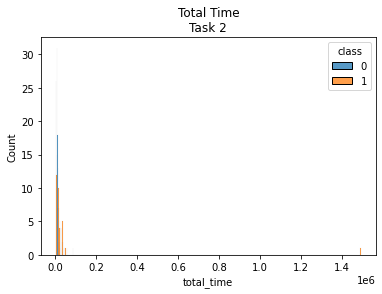

In [82]:
sns.histplot(data=df5, x="total_time", hue = 'class', multiple = 'dodge')
plt.title('Total Time\nTask 2')

# Machine Learning Models

In [83]:
X = df.drop("class", axis=1)
y = df["class"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [84]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Full Dataset
 ---Tasks 2, 6, 12, 15, 22

# Support Vector Machine

In [85]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [86]:
svcpredictions = model.predict(X_test)
print(classification_report(y_test, svcpredictions))
print(confusion_matrix(y_test, svcpredictions))

#Accuracy 0.82

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.83      0.75      0.79        20

    accuracy                           0.82        44
   macro avg       0.82      0.81      0.81        44
weighted avg       0.82      0.82      0.82        44

[[21  3]
 [ 5 15]]


# Random Forest

In [87]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
rf_pred = rf.predict(X_test)
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))

#Accuracy 0.86


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.82      0.90      0.86        20

    accuracy                           0.86        44
   macro avg       0.86      0.87      0.86        44
weighted avg       0.87      0.86      0.86        44

[[20  4]
 [ 2 18]]


# Logistic Regression

In [89]:
lgm = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
lgm.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [90]:
lrpredictions = lgm.predict(X_test)
print(classification_report(y_test, lrpredictions))
print(confusion_matrix(y_test, lrpredictions))

#Accuracy 0.86

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.85      0.85      0.85        20

    accuracy                           0.86        44
   macro avg       0.86      0.86      0.86        44
weighted avg       0.86      0.86      0.86        44

[[21  3]
 [ 3 17]]


# Artificial Neural Network

In [91]:
#Early stopping
early_stop = EarlyStopping(monitor = 'val_loss',
                            mode = 'min',
                            verbose = 1,
                            patience = 25)

In [92]:
#ANN model with adam optimizer, full 90 input nodes, dropout
model = Sequential()
model.add(Dense(units = 90, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 45, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam')

2022-12-09 17:55:31.390144: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [93]:
model.fit(x = X_train, y = y_train,
          epochs = 500,
          validation_data = (X_test, y_test),
          verbose = 1,
          callbacks = [early_stop])

2022-12-09 17:55:31.522209: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
5/5 [==============================] - 1s 53ms/step - loss: 0.7637 - val_loss: 0.6957
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7031 - val_loss: 0.6795
Epoch 3/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6702 - val_loss: 0.6630
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6695 - val_loss: 0.6486
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6442 - val_loss: 0.6340
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6342 - val_loss: 0.6201
Epoch 7/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6255 - val_loss: 0.6063
Epoch 8/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6272 - val_loss: 0.5939
Epoch 9/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6227 - val_loss: 0.5882
Epoch 10/500
5/5 [==============================] - 0s 10ms/step - loss: 0.5930 - val_loss: 0.5945
Epoch 11/500
5/5 [=

<AxesSubplot:>

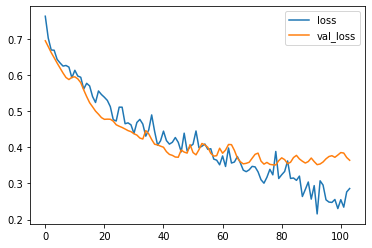

In [94]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [95]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

#Accuracy 0.84

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.89      0.80      0.84        20

    accuracy                           0.86        44
   macro avg       0.87      0.86      0.86        44
weighted avg       0.87      0.86      0.86        44

[[22  2]
 [ 4 16]]


# ML for Individual Tasks

 # Task 2 ML Models

In [96]:
X2 = df1.drop("class", axis=1)
y2 = df1["class"]
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state = 100)

In [97]:
scaler = MinMaxScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)


In [98]:
model = SVC()

In [99]:
model.fit(X_train2, y_train2)

SVC()

In [100]:
svcpredictions2 = model.predict(X_test2)
print(classification_report(y_test2, svcpredictions2))
print(confusion_matrix(y_test2, svcpredictions2))

#Accuracy 0.64

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        24
           1       0.60      0.60      0.60        20

    accuracy                           0.64        44
   macro avg       0.63      0.63      0.63        44
weighted avg       0.64      0.64      0.64        44

[[16  8]
 [ 8 12]]


In [101]:
rf.fit(X_train2, y_train2)


RandomForestClassifier()

In [102]:
rfpredictions2 = rf.predict(X_test2)
print(classification_report(y_test2, rfpredictions2))
print(confusion_matrix(y_test2, rfpredictions2))

#Accuracy 0.66

              precision    recall  f1-score   support

           0       0.68      0.71      0.69        24
           1       0.63      0.60      0.62        20

    accuracy                           0.66        44
   macro avg       0.66      0.65      0.65        44
weighted avg       0.66      0.66      0.66        44

[[17  7]
 [ 8 12]]


In [103]:
lgm.fit(X_train2,y_train2)

LogisticRegression(max_iter=10000)

In [104]:
lrpredictions2 = lgm.predict(X_test2)
print(classification_report(y_test2, lrpredictions2))
print(confusion_matrix(y_test2, lrpredictions2))

#Accuracy 0.68

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        24
           1       0.67      0.60      0.63        20

    accuracy                           0.68        44
   macro avg       0.68      0.68      0.68        44
weighted avg       0.68      0.68      0.68        44

[[18  6]
 [ 8 12]]


In [105]:
model = Sequential()
model.add(Dense(units = 18, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 12, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam')

In [106]:
model.fit(x = X_train2, y = y_train2,
          epochs = 500,
          validation_data = (X_test2, y_test2),
          verbose = 1,
          callbacks = [early_stop])

Epoch 1/500
5/5 [==============================] - 1s 44ms/step - loss: 0.6971 - val_loss: 0.6955
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7056 - val_loss: 0.6932
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6823 - val_loss: 0.6911
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6956 - val_loss: 0.6892
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7257 - val_loss: 0.6875
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6979 - val_loss: 0.6862
Epoch 7/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6758 - val_loss: 0.6848
Epoch 8/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6936 - val_loss: 0.6836
Epoch 9/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6973 - val_loss: 0.6823
Epoch 10/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7108 - val_loss: 0.6809
Epoch 11/500
5/5 [===

<AxesSubplot:>

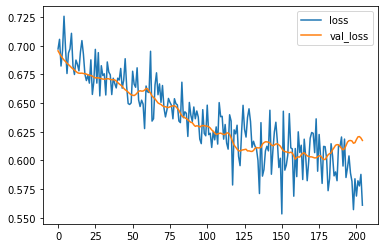

In [107]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [108]:
predictions = (model.predict(X_test2) > 0.5).astype("int32")
print(classification_report(y_test2, predictions))
print(confusion_matrix(y_test2, predictions))

#Accuracy 0.64

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        24
           1       0.62      0.80      0.70        20

    accuracy                           0.68        44
   macro avg       0.70      0.69      0.68        44
weighted avg       0.70      0.68      0.68        44

[[14 10]
 [ 4 16]]


# Task 6 ML Models

In [109]:
X6 = df2.drop("class", axis=1)
y6 = df2["class"]
X_train6,X_test6,y_train6,y_test6 = train_test_split(X6, y6, test_size = 0.25, random_state = 100)

In [110]:
scaler = MinMaxScaler()

scaler.fit(X_train6)
X_train6 = scaler.transform(X_train6)
X_test6 = scaler.transform(X_test6)


In [111]:
model = SVC()


In [112]:
model.fit(X_train6, y_train6)


SVC()

In [113]:
svcpredictions6 = model.predict(X_test6)
print(classification_report(y_test6, svcpredictions6))
print(confusion_matrix(y_test6, svcpredictions6))

#Accuracy 0.66

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        24
           1       0.65      0.55      0.59        20

    accuracy                           0.66        44
   macro avg       0.66      0.65      0.65        44
weighted avg       0.66      0.66      0.66        44

[[18  6]
 [ 9 11]]


In [114]:
rf.fit(X_train6, y_train6)


RandomForestClassifier()

In [115]:
rfpredictions6 = rf.predict(X_test6)
print(classification_report(y_test6, rfpredictions6))
print(confusion_matrix(y_test6, rfpredictions6))

#Accuracy 0.73

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        24
           1       0.67      0.70      0.68        20

    accuracy                           0.70        44
   macro avg       0.70      0.70      0.70        44
weighted avg       0.71      0.70      0.71        44

[[17  7]
 [ 6 14]]


In [116]:
lgm.fit(X_train6,y_train6)

LogisticRegression(max_iter=10000)

In [117]:
lrpredictions6 = lgm.predict(X_test6)
print(classification_report(y_test6, lrpredictions6))
print(confusion_matrix(y_test6, lrpredictions6))

#Accuracy 0.64

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        24
           1       0.59      0.65      0.62        20

    accuracy                           0.64        44
   macro avg       0.64      0.64      0.64        44
weighted avg       0.64      0.64      0.64        44

[[15  9]
 [ 7 13]]


In [118]:
model = Sequential()
model.add(Dense(units = 18, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 12, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam')

In [119]:
model.fit(x = X_train6, y = y_train6,
          epochs = 500,
          validation_data = (X_test6, y_test6),
          verbose = 1,
          callbacks = [early_stop])

Epoch 1/500
5/5 [==============================] - 1s 43ms/step - loss: 0.6993 - val_loss: 0.6894
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7186 - val_loss: 0.6895
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7215 - val_loss: 0.6891
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6937 - val_loss: 0.6889
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6664 - val_loss: 0.6891
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7034 - val_loss: 0.6895
Epoch 7/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6969 - val_loss: 0.6899
Epoch 8/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7012 - val_loss: 0.6904
Epoch 9/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6774 - val_loss: 0.6905
Epoch 10/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6934 - val_loss: 0.6902
Epoch 11/500
5/5 [=

<AxesSubplot:>

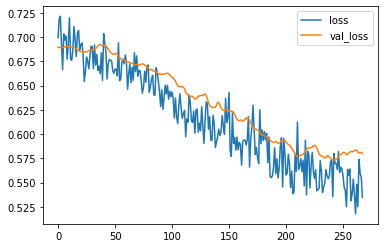

In [120]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [121]:
predictions = (model.predict(X_test6) > 0.5).astype("int32")
print(classification_report(y_test6, predictions))
print(confusion_matrix(y_test6, predictions))

#Accuracy 0.68

              precision    recall  f1-score   support

           0       0.70      0.79      0.75        24
           1       0.71      0.60      0.65        20

    accuracy                           0.70        44
   macro avg       0.70      0.70      0.70        44
weighted avg       0.70      0.70      0.70        44

[[19  5]
 [ 8 12]]


# Task 12 ML Models

In [122]:
X12 = df3.drop("class", axis=1)
y12 = df3["class"]
X_train12,X_test12,y_train12,y_test12 = train_test_split(X12, y12, test_size = 0.25, random_state = 100)


In [123]:
scaler = MinMaxScaler()

scaler.fit(X_train12)
X_train12 = scaler.transform(X_train12)
X_test12 = scaler.transform(X_test12)


In [124]:
model = SVC()


In [125]:
model.fit(X_train12, y_train12)


SVC()

In [126]:
svcpredictions12 = model.predict(X_test12)
print(classification_report(y_test12, svcpredictions12))
print(confusion_matrix(y_test12, svcpredictions12))

0.82

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.88      0.70      0.78        20

    accuracy                           0.82        44
   macro avg       0.83      0.81      0.81        44
weighted avg       0.83      0.82      0.82        44

[[22  2]
 [ 6 14]]


0.82

In [127]:
rf.fit(X_train12, y_train12)


RandomForestClassifier()

In [128]:
rfpredictions12 = rf.predict(X_test12)
print(classification_report(y_test12, rfpredictions12))
print(confusion_matrix(y_test12, rfpredictions12))

0.70

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.68      0.75      0.71        20

    accuracy                           0.73        44
   macro avg       0.73      0.73      0.73        44
weighted avg       0.73      0.73      0.73        44

[[17  7]
 [ 5 15]]


0.7

In [129]:
lgm.fit(X_train12,y_train12)

LogisticRegression(max_iter=10000)

In [130]:
lrpredictions12 = lgm.predict(X_test12)
print(classification_report(y_test12, lrpredictions12))
print(confusion_matrix(y_test12, lrpredictions12))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.65      0.85      0.74        20

    accuracy                           0.73        44
   macro avg       0.74      0.74      0.73        44
weighted avg       0.75      0.73      0.73        44

[[15  9]
 [ 3 17]]


In [131]:
model = Sequential()
model.add(Dense(units = 18, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 12, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop')

In [132]:
model.fit(x = X_train12, y = y_train12,
          epochs = 500,
          validation_data = (X_test12, y_test12),
          verbose = 1,
          callbacks = [early_stop])

Epoch 1/500
5/5 [==============================] - 1s 45ms/step - loss: 0.7134 - val_loss: 0.6845
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7163 - val_loss: 0.6857
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7325 - val_loss: 0.6846
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7124 - val_loss: 0.6852
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7078 - val_loss: 0.6850
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7247 - val_loss: 0.6849
Epoch 7/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6961 - val_loss: 0.6844
Epoch 8/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6871 - val_loss: 0.6843
Epoch 9/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7086 - val_loss: 0.6849
Epoch 10/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6788 - val_loss: 0.6828
Epoch 11/500
5/5 [=

<AxesSubplot:>

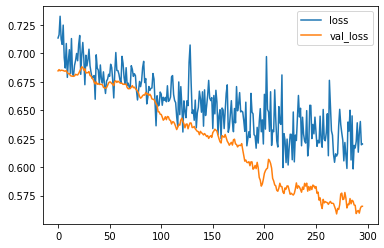

In [133]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [134]:
predictions = (model.predict(X_test12) > 0.5).astype("int32")
print(classification_report(y_test12, predictions))
print(confusion_matrix(y_test12, predictions))

#Accuracy 0.45

              precision    recall  f1-score   support

           0       0.79      0.62      0.70        24
           1       0.64      0.80      0.71        20

    accuracy                           0.70        44
   macro avg       0.71      0.71      0.70        44
weighted avg       0.72      0.70      0.70        44

[[15  9]
 [ 4 16]]


# Task 15 ML Models

In [135]:
X15 = df4.drop("class", axis=1)
y15 = df4['class']
X_train15,X_test15,y_train15,y_test15 = train_test_split(X15, y15, test_size = 0.25, random_state = 100)

In [136]:
scaler = MinMaxScaler()

scaler.fit(X_train15)
X_train15 = scaler.transform(X_train15)
X_test15 = scaler.transform(X_test15)


In [137]:
model = SVC()


In [138]:
model.fit(X_train15, y_train15)


SVC()

In [139]:
svcpredictions15 = model.predict(X_test15)
print(classification_report(y_test15, svcpredictions15))
print(confusion_matrix(y_test15, svcpredictions15))

#Accuracy 0.84

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.88      0.75      0.81        20

    accuracy                           0.84        44
   macro avg       0.85      0.83      0.84        44
weighted avg       0.85      0.84      0.84        44

[[22  2]
 [ 5 15]]


In [140]:
rf.fit(X_train15, y_train15)


RandomForestClassifier()

In [141]:
rfpredictions15 = rf.predict(X_test15)
print(classification_report(y_test15, rfpredictions15))
print(confusion_matrix(y_test15, rfpredictions15))

#Accuracy 0.68

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        24
           1       0.67      0.60      0.63        20

    accuracy                           0.68        44
   macro avg       0.68      0.68      0.68        44
weighted avg       0.68      0.68      0.68        44

[[18  6]
 [ 8 12]]


In [142]:
lgm.fit(X_train15,y_train15)


LogisticRegression(max_iter=10000)

In [143]:
lrpredictions15 = lgm.predict(X_test15)
print(classification_report(y_test15, lrpredictions15))
print(confusion_matrix(y_test15, lrpredictions15))

#Accuracy 0.89

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.89      0.85      0.87        20

    accuracy                           0.89        44
   macro avg       0.89      0.88      0.88        44
weighted avg       0.89      0.89      0.89        44

[[22  2]
 [ 3 17]]


In [144]:
model = Sequential()
model.add(Dense(units = 18, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 12, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam')

In [145]:
model.fit(x = X_train15, y = y_train15,
          epochs = 500,
          validation_data = (X_test15, y_test15),
          verbose = 1,
          callbacks = [early_stop])

Epoch 1/500
5/5 [==============================] - 1s 43ms/step - loss: 0.7571 - val_loss: 0.6987
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7636 - val_loss: 0.6960
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7551 - val_loss: 0.6938
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7088 - val_loss: 0.6925
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6881 - val_loss: 0.6923
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7424 - val_loss: 0.6926
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7064 - val_loss: 0.6926
Epoch 8/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7251 - val_loss: 0.6922
Epoch 9/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6882 - val_loss: 0.6916
Epoch 10/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7169 - val_loss: 0.6902
Epoch 11/500
5/5 [==

<AxesSubplot:>

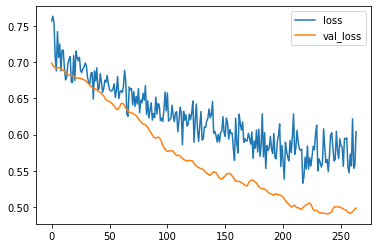

In [146]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [147]:
predictions = (model.predict(X_test15) > 0.5).astype("int32")
print(classification_report(y_test15, predictions))
print(confusion_matrix(y_test15, predictions))

#Accuracy 0.80

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.85      0.85      0.85        20

    accuracy                           0.86        44
   macro avg       0.86      0.86      0.86        44
weighted avg       0.86      0.86      0.86        44

[[21  3]
 [ 3 17]]


# Task 22 ML Models

In [148]:
X22 = df5.drop("class", axis=1)
y22 = df5["class"]
X_train22,X_test22,y_train22,y_test22 = train_test_split(X22, y22, test_size = 0.25, random_state = 100)

In [149]:
scaler = MinMaxScaler()

scaler.fit(X_train22)
X_train22 = scaler.transform(X_train22)
X_test22 = scaler.transform(X_test22)


In [150]:
model = SVC()


In [151]:
model.fit(X_train22, y_train22)


SVC()

In [152]:
svcpredictions22 = model.predict(X_test22)
print(classification_report(y_test22, svcpredictions22))
print(confusion_matrix(y_test22, svcpredictions22))

#Accuracy 0.75

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.74      0.70      0.72        20

    accuracy                           0.75        44
   macro avg       0.75      0.75      0.75        44
weighted avg       0.75      0.75      0.75        44

[[19  5]
 [ 6 14]]


In [153]:
rf.fit(X_train22, y_train22)


RandomForestClassifier()

In [154]:
rfpredictions22 = rf.predict(X_test22)
print(classification_report(y_test22, rfpredictions22))
print(confusion_matrix(y_test22, rfpredictions22))

#Accuracy0.68

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.71      0.75      0.73        20

    accuracy                           0.75        44
   macro avg       0.75      0.75      0.75        44
weighted avg       0.75      0.75      0.75        44

[[18  6]
 [ 5 15]]


In [155]:
lgm.fit(X_train22,y_train22)


LogisticRegression(max_iter=10000)

In [156]:
lrpredictions22 = lgm.predict(X_test22)
print(classification_report(y_test22, lrpredictions22))
print(confusion_matrix(y_test22, lrpredictions22))

#Accuracy 0.68

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        24
           1       0.64      0.70      0.67        20

    accuracy                           0.68        44
   macro avg       0.68      0.68      0.68        44
weighted avg       0.69      0.68      0.68        44

[[16  8]
 [ 6 14]]


In [157]:
model = Sequential()
model.add(Dense(units = 18, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 12, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop')

In [158]:
model.fit(x = X_train22, y = y_train22,
          epochs = 500,
          validation_data = (X_test22, y_test22),
          verbose = 1,
          callbacks = [early_stop])

Epoch 1/500
5/5 [==============================] - 1s 42ms/step - loss: 0.6655 - val_loss: 0.6606
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6935 - val_loss: 0.6568
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7034 - val_loss: 0.6542
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6956 - val_loss: 0.6520
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6759 - val_loss: 0.6511
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6630 - val_loss: 0.6500
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6717 - val_loss: 0.6486
Epoch 8/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6904 - val_loss: 0.6480
Epoch 9/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6560 - val_loss: 0.6447
Epoch 10/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6729 - val_loss: 0.6436
Epoch 11/500
5/5 [=====

<AxesSubplot:>

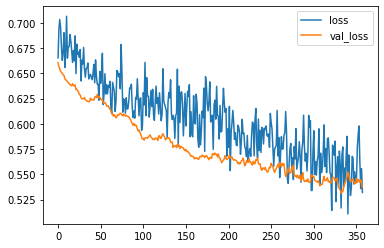

In [159]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [160]:
predictions = (model.predict(X_test22) > 0.5).astype("int32")
print(classification_report(y_test22, predictions))
print(confusion_matrix(y_test22, predictions))

#Accuracy 0.75

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        24
           1       0.70      0.70      0.70        20

    accuracy                           0.73        44
   macro avg       0.72      0.72      0.72        44
weighted avg       0.73      0.73      0.73        44

[[18  6]
 [ 6 14]]
